# Technical Analysis Techniques using cross over techniques

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [19]:
def read_stock_data():
    return pd.read_csv('TSLA.csv')

stock_data = read_stock_data()
stock_data.head()

,Date,Close,High,Low,Open,Volume
0,2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
1,2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2,2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
3,2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400
4,2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


In [ ]:


def moving_average_crossover(stock_data, short_window=50, long_window=200):
    """
    Compute short and long moving averages and detect crossover signals.
    """
    stock_data['Short_MA'] = #your code here
    stock_data['Long_MA'] = # your code here
    stock_data['Signal'] = 0
    stock_data.loc[stock_data['Short_MA'] > stock_data['Long_MA'], 'Signal'] = 1
    stock_data['Crossover'] = stock_data['Signal'].diff()
    return stock_data

stock_data = moving_average_crossover(stock_data)
stock_data.head()


,Date,Close,High,Low,Open,Volume,Short_MA,Long_MA,Signal,Crossover
0,2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200,NaN,NaN,0,NaN
1,2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600,NaN,NaN,0,0.0
2,2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300,NaN,NaN,0,0.0
3,2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400,NaN,NaN,0,0.0
4,2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600,NaN,NaN,0,0.0


In [ ]:
def rsi(stock_data, period=14):
    """
    Compute the Relative Strength Index (RSI).
    RSI is a momentum oscillator that measures the speed and change of price movements.
    It ranges from 0 to 100 and is typically used to identify overbought or oversold conditions.
    An RSI above 70 is considered overbought, while an RSI below 30 is considered oversold.
    The RSI is calculated using the average gain and average loss over a specified period.
    """
    delta = # your code here
    # the above line calculates the difference between the current and previous closing prices
    gain = # your code here
    # the above line calculates the average gain over the specified period
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    stock_data['RSI'] = 100 - (100 / (1 + rs))
    return stock_data

stock_data = rsi(stock_data)
stock_data.tail()

,Date,Close,High,Low,Open,Volume,Short_MA,Long_MA,Signal,Crossover,RSI
247,2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800,329.6920,233.66755,1,0.0,72.174769
248,2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400,334.3832,235.05050,1,0.0,68.250827
249,2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800,338.5898,236.36140,1,0.0,59.044415
250,2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000,342.5202,237.63595,1,0.0,55.561821
251,2024-12-31,403.839996,427.929993,402.540009,423.790009,76825100,346.1830,238.83730,1,0.0,50.568478


In [ ]:
def bollinger_bands(stock_data, window=20):
    """
    Compute Bollinger Bands.
    Bollinger Bands consist of a middle band (simple moving average) and two outer bands (standard deviations).
    The outer bands are typically set two standard deviations away from the middle band.
    The bands expand and contract based on market volatility.
    """
    stock_data['Middle_Band'] = # your code here
    stock_data['Upper_Band'] =  # your code here
    stock_data['Lower_Band'] = # your code here
    return stock_data

stock_data = bollinger_bands(stock_data)


In [8]:
def plot_technical_indicators(stock_data):
    """
    Plot stock price with moving averages, RSI, and Bollinger Bands.
    """
    fig, axs = plt.subplots(2, figsize=(12, 8), sharex=True)
    
    # Price chart with moving averages and Bollinger Bands
    axs[0].plot(stock_data['Close'], label='Stock Price', color='blue', alpha=0.6)
    axs[0].plot(stock_data['Short_MA'], label='Short MA (50)', color='green', linestyle='dashed')
    axs[0].plot(stock_data['Long_MA'], label='Long MA (200)', color='red', linestyle='dashed')
    axs[0].plot(stock_data['Upper_Band'], label='Upper Band', color='black', linestyle='dotted')
    axs[0].plot(stock_data['Lower_Band'], label='Lower Band', color='black', linestyle='dotted')
    axs[0].set_title('Stock Price with Moving Averages & Bollinger Bands')
    axs[0].legend()
    axs[0].grid()
    
    # RSI Chart
    axs[1].plot(stock_data['RSI'], label='RSI', color='purple')
    axs[1].axhline(70, linestyle='dashed', color='red')
    axs[1].axhline(30, linestyle='dashed', color='green')
    axs[1].set_title('Relative Strength Index (RSI)')
    axs[1].legend()
    axs[1].grid()
    
    plt.show()

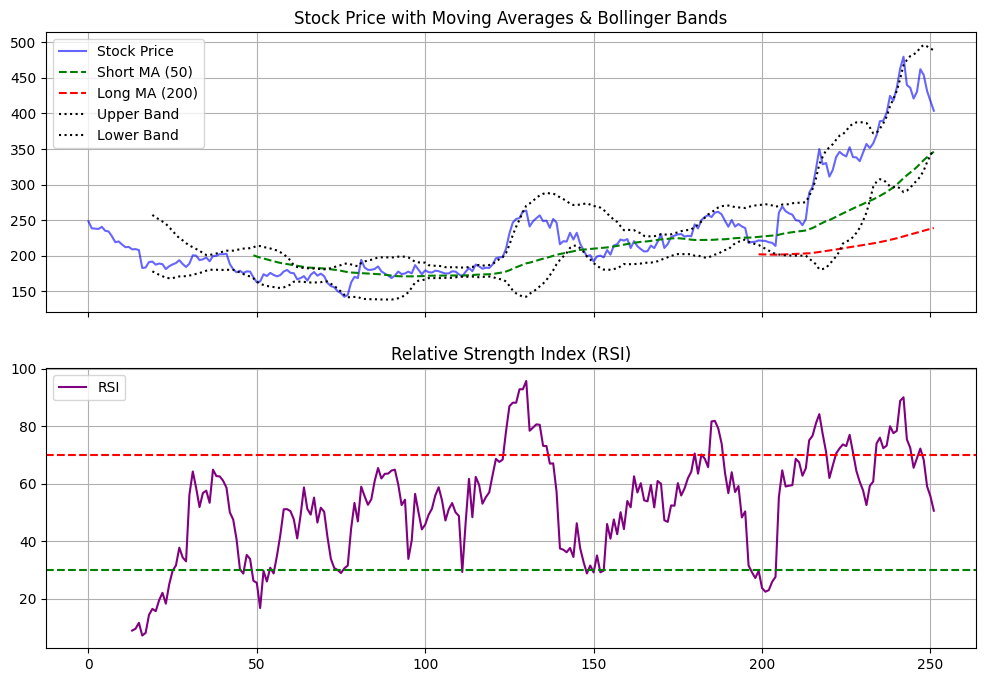

In [25]:

if __name__ == "__main__": 
    plot_technical_indicators(stock_data)
